## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [51]:
#1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

air = pd.read_csv('/Users/nguyen/Desktop/Spring 24/DS 3001/Data/airbnb_hw.csv')
air['price'] = air['Price']
air['beds'] = air['Beds']
air['n_reviews'] = air['Number Of Reviews']
air['score'] = air['Review Scores Rating']
X = air.loc[:,['price','beds','n_reviews','score']]
X = X.dropna()
X['price'].value_counts()
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')
X['beds'] = X['beds'].fillna(1)

print(pd.crosstab(air['score'].isnull(), air['n_reviews']>0))


n_reviews  False  True 
score                  
False          0  22155
True        7814    509


In [52]:
#2.
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

In [55]:
#3
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)  
model = model.fit(Z) 
Z['cluster'] = model.labels_

/Users/nguyen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


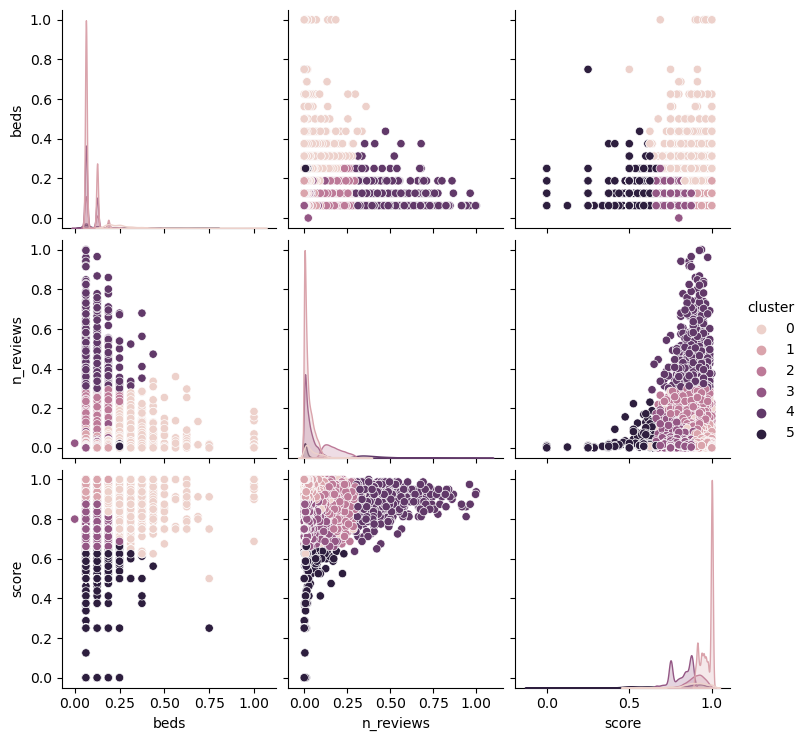

In [56]:
#4
sns.pairplot(data=Z,hue='cluster')

In [57]:
#5
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

#Cluster 0 is about $300 per night which is higher than all of the other clusters at around $140 per night, more than half of cluster 3. 

price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         1636.0  293.111858  262.326864  27.0  150.0  228.5  350.0   4500.0
1        10502.0  152.256523  147.253694  10.0   85.0  130.0  190.0  10000.0
2         2994.0  141.760855   84.027486  22.0   88.0  125.0  175.0   1000.0
3         5540.0  131.425812  102.645764  20.0   75.0  110.0  169.0   5000.0
4          782.0  133.094629   83.441201  27.0   80.0  109.5  166.5    875.0
5          657.0  133.354642  212.058495  25.0   65.0   99.0  155.0   5000.0

/Users/nguyen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        12138.0  171.241473  174.198076  10.0  90.0  140.0  200.0  10000.0
1         8534.0  135.051676   96.644624  20.0  80.0  119.0  170.0   5000.0
2         1439.0  133.213343  155.870791  25.0  70.0  100.0  165.0   5000.0

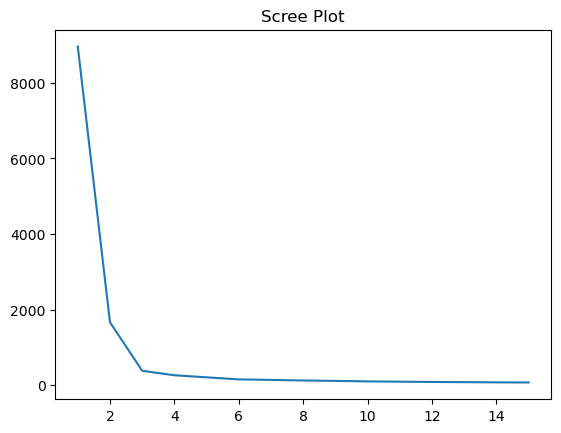

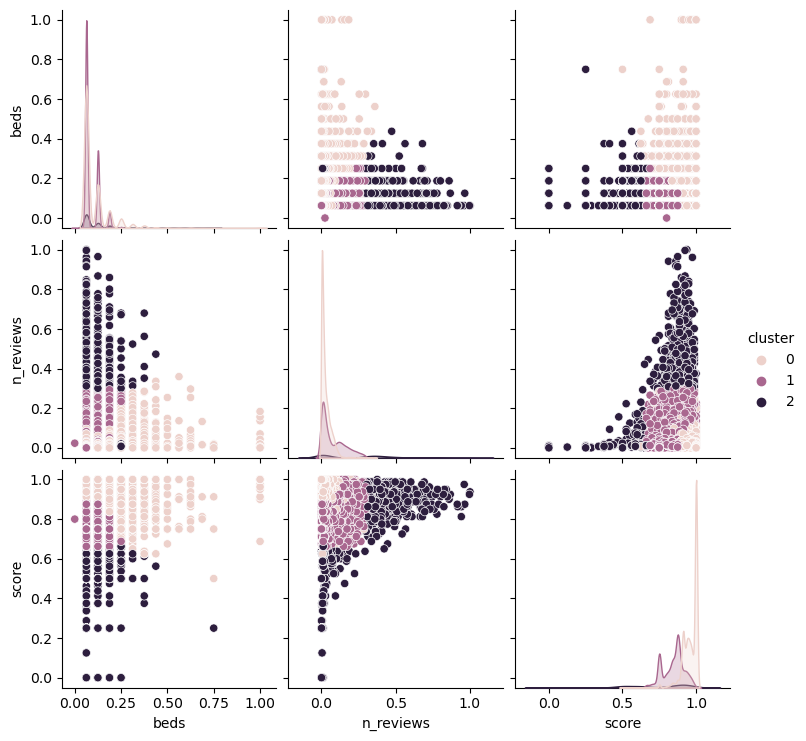

In [75]:
6.
k_bar = 15
k_grid = np.arange(1,k_bar+1) 
SSE = np.zeros(k_bar)
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(Z) 
    SSE[k] = model.inertia_ 
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) 
model = model.fit(Z) 
Z['cluster'] = model.labels_
sns.pairplot(data=Z,hue='cluster')
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [62]:
1.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) 
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

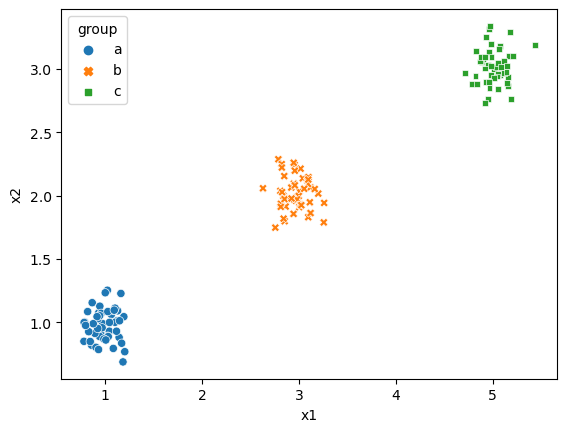

In [63]:
2.
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

#As the noise increases, the cluster scatter and starts to mix with other clutters. 

<Axes: xlabel='x1', ylabel='x2'>

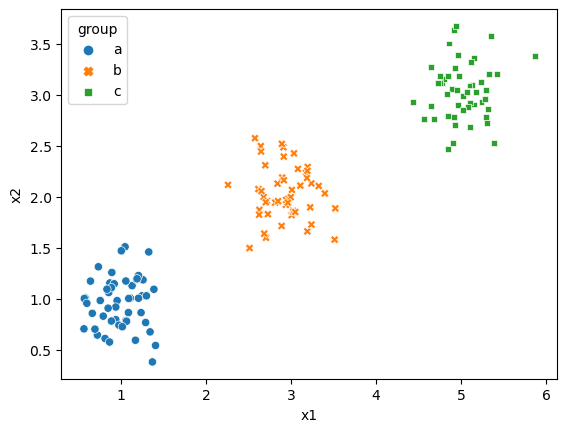

In [64]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

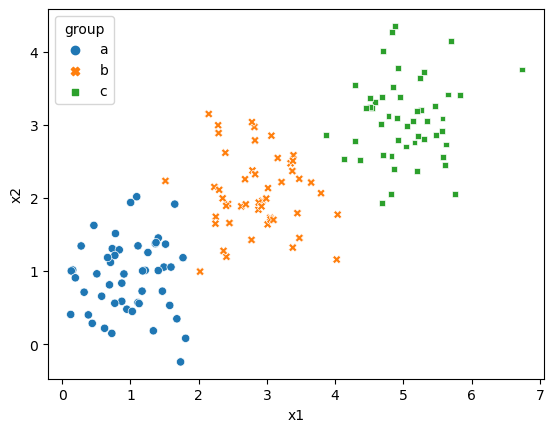

In [65]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

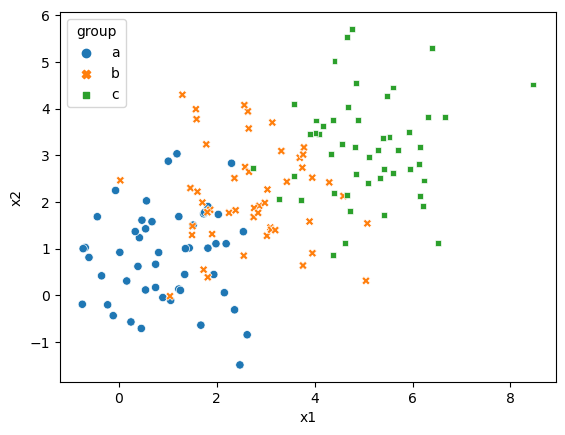

In [66]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

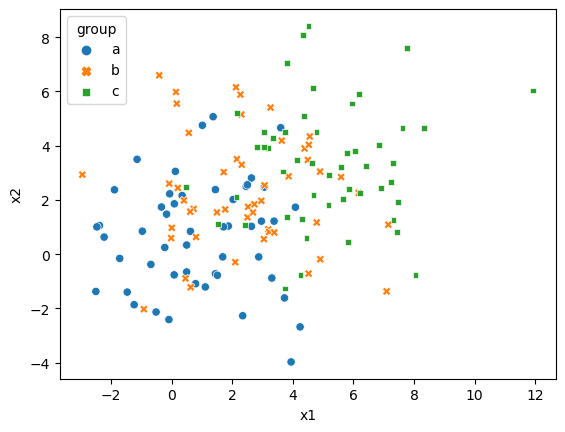

In [67]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [68]:
3.
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): 
    X = data.loc[ : , ['x1','x2'] ] 
    X = X.apply(maxmin)
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) 
    SSE = np.zeros(k_bar) 
    for k in range(k_bar): 
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
        model = model.fit(X) 
        SSE[k] = model.inertia_ 
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)
    
    #As noise increases, the ability to identify a distinct elbow decreases. Up until when noise = 1, there was a clearly identifiable elbow at k=3. Past that, the curve became more flat. 

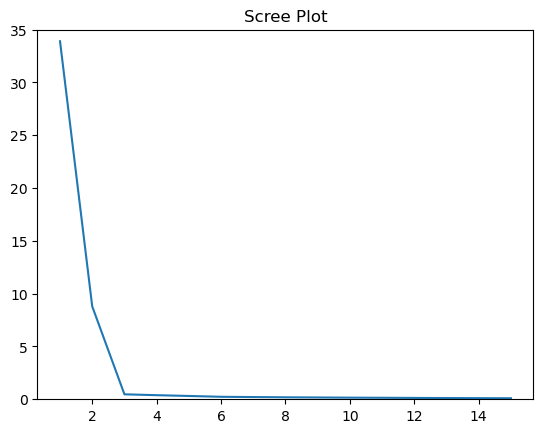

In [69]:
scree( data = df0_125 )

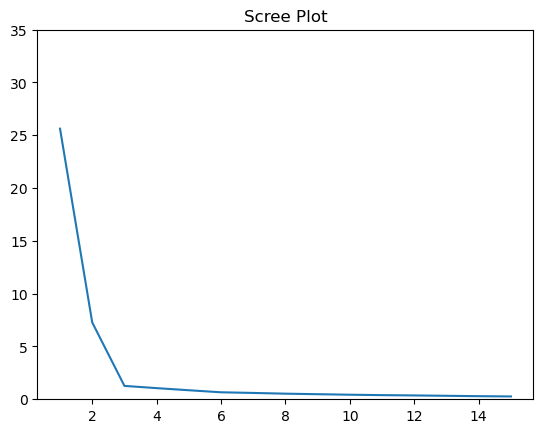

In [70]:
scree( data = df0_25 )

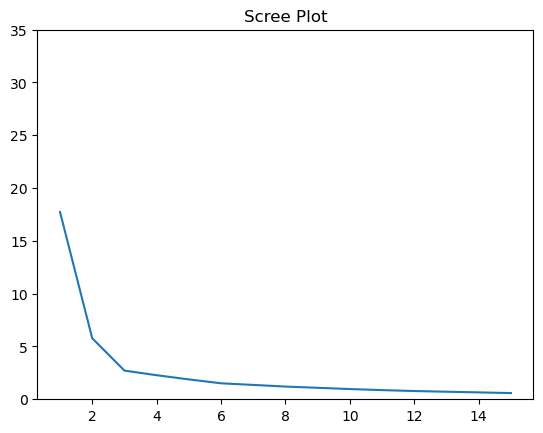

In [71]:
scree( data = df0_5 )

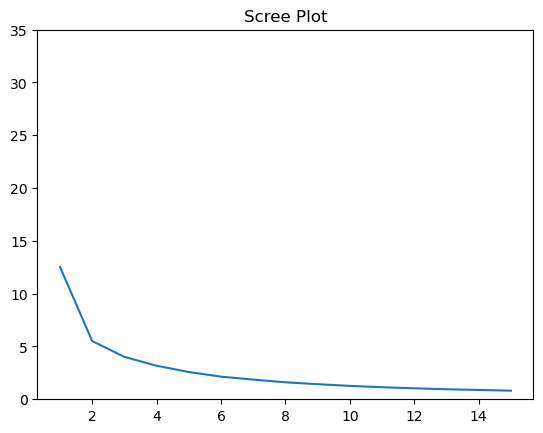

In [72]:
scree( df1_0 )

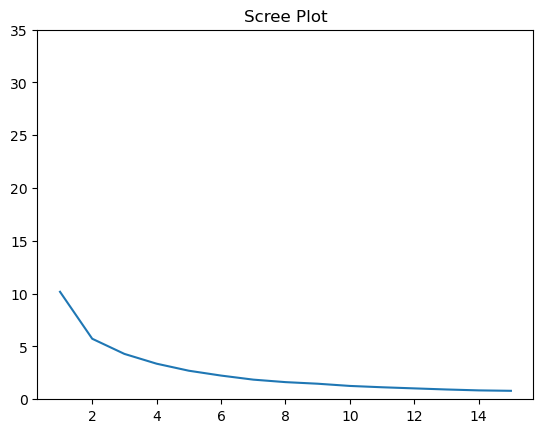

In [73]:
scree( df2_0 )

In [ ]:
4.
The concept of an elbow helps us determine the amount of clusters that is optimal. The more clusters there are, the risk of overfitting increases, and if there aren't enough clusters, underfitting might happen. The curve starts off declining steeply then levels out. When the cruve starts leveling out, this is the elbow and is supposed to be a good point where the rate of diminishing returns is minimal.  